In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Prostate_Cancer.csv')

Question 1

1. If the question calls for k = 3, the shapes included would be one red circle, and two blue triangles. Thus, the shape is deamed to be triangle.

2. If the question calls for k = 5, the shapes included would be three red circles, and two blue triangles.Thus, the shape is deamed to be circle.

Question 2

In [3]:
#Checking for null values and dropping the class "id"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
df = df.drop(['id'], axis=1)
df = df.dropna().copy()
df.info() #recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


Now id is gone, and all our data remains the same. It doesn't look like there are any null values. Now we need to replace diagnosis result with numerical values. Using 0's and 1's to show the status

In [6]:
df['diagnosis_result'] = df['diagnosis_result'].replace({'M': 1, 'B': 0})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    int64  
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 7.2 KB


In [8]:
df.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


Looks like it worked, now diagnosis result has 0's and 1's to represent the different result status.

Question 3

#Now we are to check the relationships between the target variable and it's features. All of our data is numeric so we shouldn't have to excluse any data.

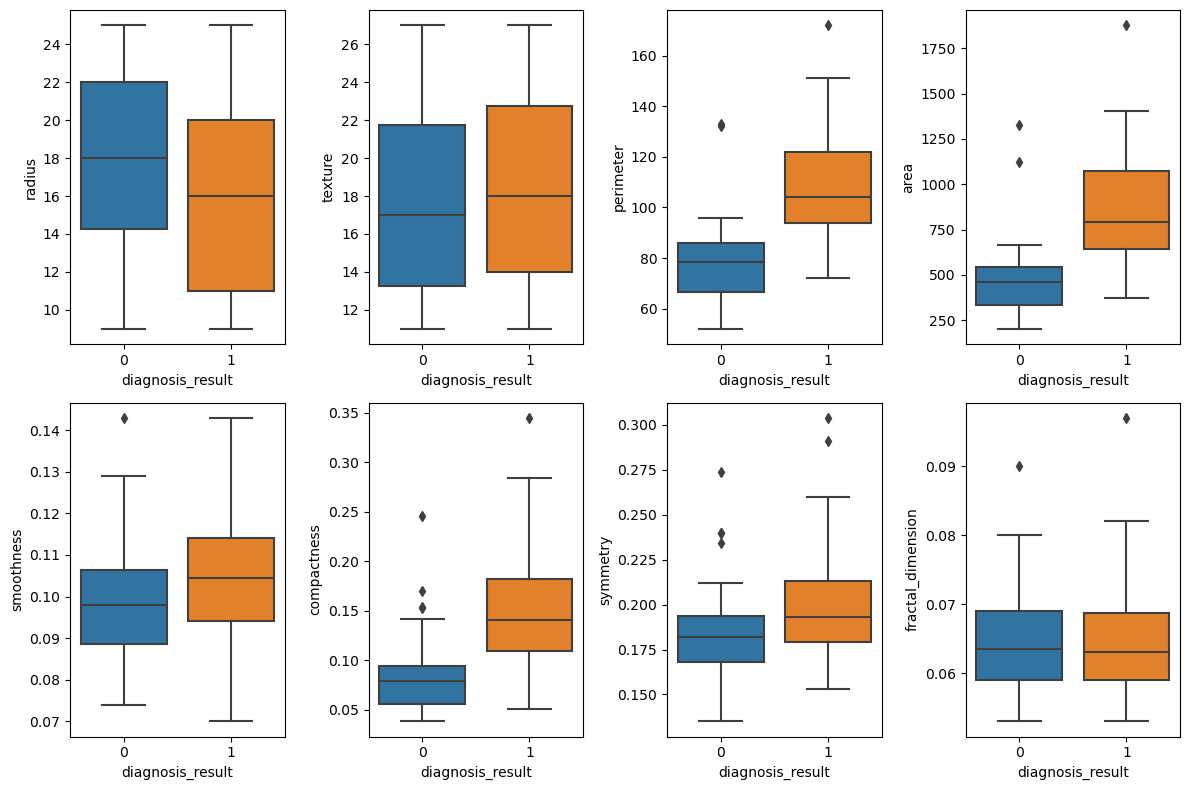

In [15]:
import seaborn as sns

num_list = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
plt.figure(figsize = (12, 8))

for column in num_list:
    plt.subplot(2, 4, num_list.index(column) + 1)
    sns.boxplot(x = 'diagnosis_result', y = column, data = df)

plt.tight_layout()
plt.show()


In [17]:
#We drop the overlapping boxes as they don't show a signifigant difference.
df = df.drop(['radius', 'smoothness', 'texture', 'symmetry', 'fractal_dimension'], axis=1)
df = df.dropna().copy()
df.info() #recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diagnosis_result  100 non-null    int64  
 1   perimeter         100 non-null    int64  
 2   area              100 non-null    int64  
 3   compactness       100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


Question 4

In [21]:
print(df.corr())

                  diagnosis_result  perimeter      area  compactness
diagnosis_result          1.000000   0.607498  0.562444     0.512234
perimeter                 0.607498   1.000000  0.976648     0.527542
area                      0.562444   0.976648  1.000000     0.424950
compactness               0.512234   0.527542  0.424950     1.000000


In [22]:
#Perimeter and Area both have numbers that are very close to 1. So we will drop them.
df = df.drop(['perimeter', 'area'], axis=1)
df = df.dropna().copy()
df.info() #recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diagnosis_result  100 non-null    int64  
 1   compactness       100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


Question 5

KNN compares the distance of an object to relative points around it. Because KNN is a distance based measurement, it's entirely possible the points of the comparison may have totally different scales. Feature Scaling sets everything to a normalized rate. Making sure everything is relatively simmilar in nature. You can set up a min-max scale to have it so there's a limit on what the data points can be between. Or use Z-score to work with a simple 0 mean and 1 standard definition. 

Question 6

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#Initialize a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

Average Accuracy Score (k=3): 0.80


In [25]:
#Next we ceate the ten fold cross
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

Average Accuracy Score (k=3): 0.80


In [28]:
#Average accuracy score takes the mean of the scores
average_accuracy = np.mean(scores)

print("Average: ")
print(average_accuracy)


Average: 
0.8


Question 7

#We're going to set up K values to eb odd numbers. The reason it needs to be odd numbers instead of even, is because in a two class problem, you might accidently tie the data, which would give us a non-conclusive result.

In [29]:
k_values = list(range(1, 16))

Question 8

In [33]:
#Here we make a directory for the future to input the accuracy scores. We can use the same ten fold as initialized before.
average_accuracy_scores = {}

#Get the average for each value here.
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    average_accuracy = np.mean(scores)
    average_accuracy_scores[k] = average_accuracy

In [34]:
best_k = max(average_accuracy_scores, key=average_accuracy_scores.get)
best_accuracy = average_accuracy_scores[best_k]

print("Best K:")
print(best_k)
print("Average Accuracy Score for Best k: ")
print(best_accuracy)


Best K:
6
Average Accuracy Score for Best k: 
0.8600000000000001


Question 9

In [36]:
#Now we're going to change the method we score with cross validation to f1. We'll set it up just like last time.

k_values = list(range(1, 16))
average_f1_scores = {}
kf = KFold(n_splits=10, shuffle=True, random_state=42)

#In the loop, we'll get the average F1 score.
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kf, scoring='f1_macro')
    average_f1 = np.mean(scores)
    average_f1_scores[k] = average_f1

In [40]:
best_k_f1 = max(average_f1_scores, key=average_f1_scores.get)
best_f1_score = average_f1_scores[best_k_f1]

print("Best K:")
print(best_k_f1)
print("Average Accuracy Score for Best k: ")
print(best_f1_score)

Best K:
6
Average Accuracy Score for Best k: 
0.7954083906289788


THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor) DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work. Kade Levy